# Filament detection and segmentation

In [140]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import imageio as iio
import scipy.ndimage as ndi

### To-do
From https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980
- try active contour segmentation
- try Random walker segmentation
- unsupervised learning


(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2dba0f814e0>)

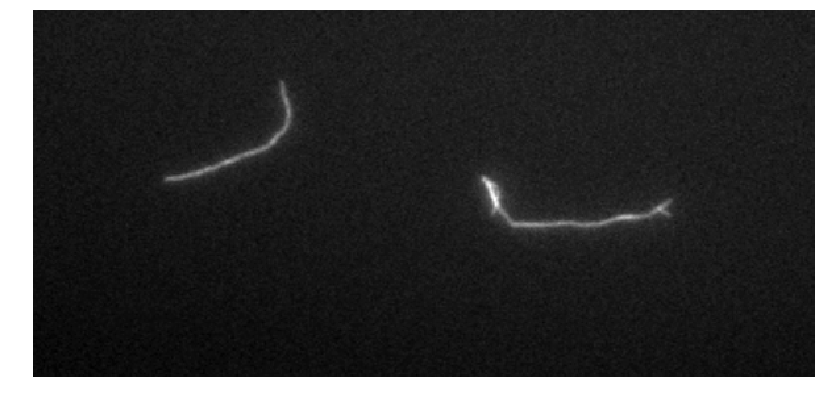

In [157]:
im = iio.imread('2fil.PNG')
im = color.rgb2gray(im) 

def im_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax
im_show(im)

# 1st approach: basic thresholding

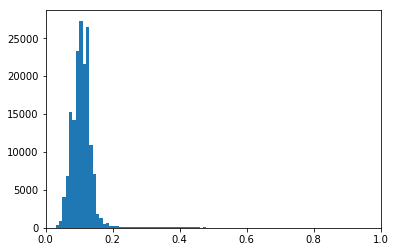

In [159]:
fig, ax = plt.subplots(1, 1)
ax.hist(im.ravel(), bins=100, range=[0, 1])
ax.set_xlim(0, 1);

### Supervised Thresholding

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2db9c7745f8>)

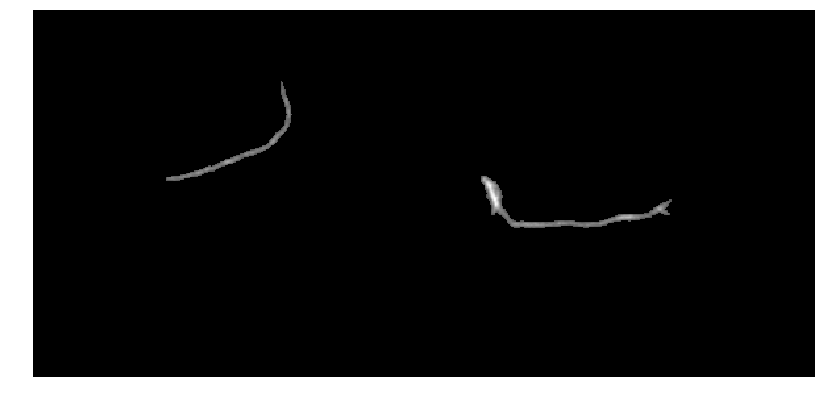

In [170]:
mask = np.where(im > 0.3,im, 0)
im_show(mask)

### Unsupervised Thresholding
Tons of options to try!

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2db90f59438>)

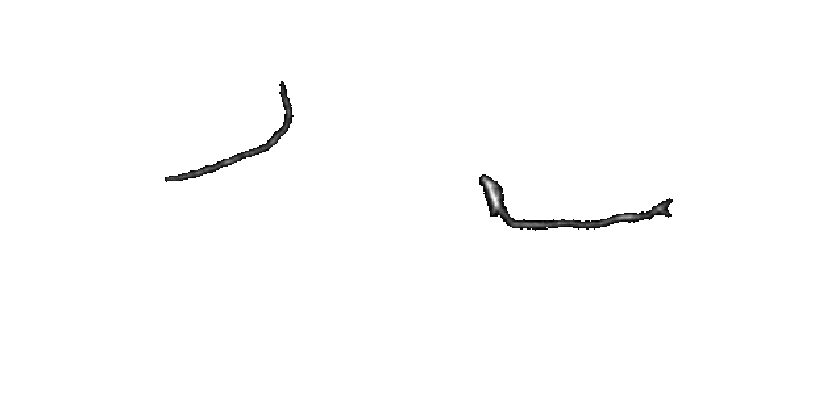

In [171]:
im_threshold = filters.threshold_otsu(im)  
im_show(np.where(im > im_threshold, im, np.NaN))

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2db91ec75c0>)

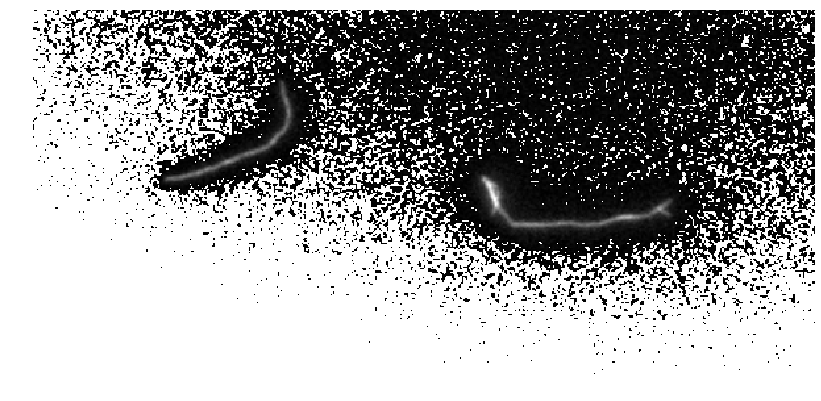

In [172]:
im_threshold = filters.threshold_li(im)  
im2 = np.where(im > im_threshold, im, np.NaN)
im_show(im2)

## Once we have the processed image

In [173]:
labels, nobjects = ndi.label(mask)
nobjects

2

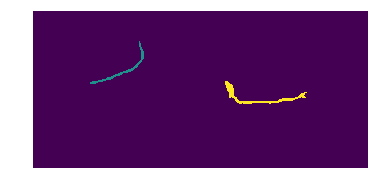

In [174]:
plt.imshow(labels)
plt.axis('off')
plt.show()

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2dba870a940>)

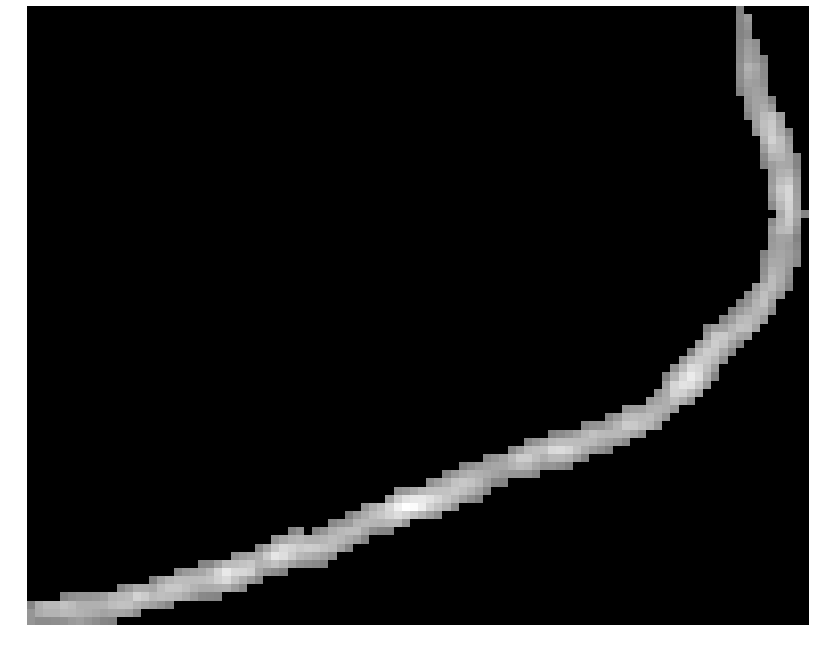

In [293]:
boxes = ndi.find_objects(labels)
object_0 = mask[boxes[0]]
object_1 = mask[boxes[1]]
im_show(object_0, cmap='gray')

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2dba87786a0>)

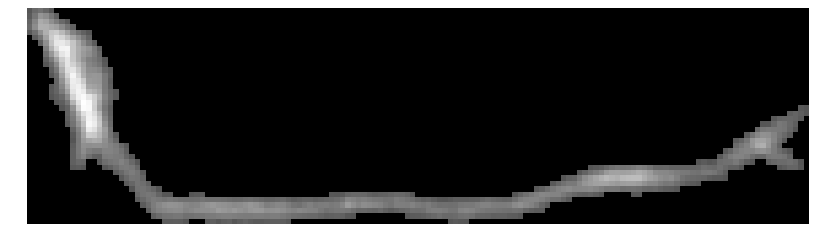

In [295]:
im_show(object_1, cmap='gray')

In [296]:
def backbone_detection(im):
    r, c = im.shape
    maxs = []
    for i in range(r):
        maxs.append([i, np.argmax(im[i])])
    backbone = np.zeros([r,c])
    for i in range(r):
        for j in range(c):
            if j == maxs[i][1]:
                backbone[i][j] = 1
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(im)
    ax[1].imshow(backbone)
    plt.show()

In [290]:
def backbone_detection2(im):
    imt = im.transpose()
    r, c = im.shape
    maxs1 = []
    maxs2 = []
    for i in range(r):
        maxs1.append([i, np.argmax(im[i])])
    for i in range(c):
        maxs2.append([i, np.argmax(imt[i])])
    backbone1 = np.zeros([r,c])
    backbone2 = np.zeros([c, r])
    for i in range(r):
        for j in range(c):
            if j == maxs1[i][1]:
                backbone1[i][j] = 1
    for i in range(c):
        for j in range(r):
            if j == maxs2[i][1]:
                backbone2[i][j] = 1
    backbone = backbone1 + backbone2.transpose()
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(im)
    ax[0].axis('off')
    ax[1].imshow(backbone)
    ax[1].axis('off')
    plt.show()

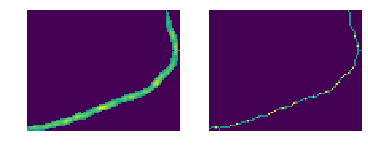

In [300]:
backbone_detection2(object_0)

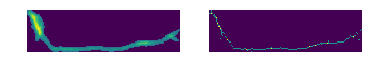

In [299]:
backbone_detection2(object_1)